<a href="https://colab.research.google.com/github/sbrugman/spatial-transformer-GAN/blob/master/spatial-transformer-GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up Colab environment

In [1]:
!pip3 install --upgrade numpy scipy imageio termcolor tensorflow-gpu

    100% |████████████████████████████████| 13.9MB 2.8MB/s 
    100% |████████████████████████████████| 26.6MB 1.8MB/s 
Requirement already up-to-date: imageio in /usr/local/lib/python3.6/dist-packages (2.4.1)
Requirement already up-to-date: termcolor in /usr/local/lib/python3.6/dist-packages (1.1.0)
    100% |████████████████████████████████| 281.7MB 79kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x500ee000 @  0x7fc0fdd762a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.0 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatibl

In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176


In [0]:
# Remove CUDA 9 completely
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-390-dev' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-375-diagnostic' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-compute-390' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-331-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-cg-toolkit' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common-390' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common-396

In [0]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt update -q
!apt install cuda-9-0 gcc-6 g++-6 -y -q
!ln -s /usr/bin/gcc-6 /usr/local/cuda/bin/gcc
!ln -s /usr/bin/g++-6 /usr/local/cuda/bin/g++

--2019-01-07 13:10:37--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.162.216
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.162.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?K7zC0OUbL2cftxqpXRQYAaXfKeUgMJPCgsAUKXpw04Dzdg_NHrqwQarbu-a72lOV8hqxwcZmnmjYQ07vzRJNyXzmjG9NcIiq2JOjtAFJi3qFeAYY12OfUqqyADwF06C_272OxCcVMiKx8V1iifFqRSQkD-uGI-ZY9h69iq47XaRiNfX3Txy_L-0NlhfMr8haVO_UiRAHDPl1U9BjYuAk [following]
--2019-01-07 13:10:38--  https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?K7zC0OUbL2cftxqpXRQYAaXfKeUgMJPCgsAUKXpw04Dzdg_NHrqwQarbu-a72lOV8hqxwcZmnmjYQ07vzRJNyXzmjG9NcIiq2JOjtAFJi3qFeA

# Set up sp-GAN

In [0]:
!git clone https://github.com/chenhsuanlin/spatial-transformer-GAN.git

Cloning into 'spatial-transformer-GAN'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 87 (delta 15), reused 15 (delta 4), pack-reused 51
Unpacking objects: 100% (87/87), done.


# sp-GAN glasses

In [3]:
!wget -O glasses-pretained.tar.gz wget https://cmu.box.com/shared/static/ygl08wfsc2omutwrvra3u7zjjsu1ovwv.gz
!tar xvzf glasses-pretrained.tar.gz

--2019-01-09 08:09:10--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2019-01-09 08:09:10--  https://cmu.box.com/shared/static/ygl08wfsc2omutwrvra3u7zjjsu1ovwv.gz
Resolving cmu.box.com (cmu.box.com)... 107.152.27.197
Connecting to cmu.box.com (cmu.box.com)|107.152.27.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cmu.app.box.com/shared/static/ygl08wfsc2omutwrvra3u7zjjsu1ovwv.gz [following]
--2019-01-09 08:09:10--  https://cmu.app.box.com/shared/static/ygl08wfsc2omutwrvra3u7zjjsu1ovwv.gz
Resolving cmu.app.box.com (cmu.app.box.com)... 107.152.24.199, 107.152.25.199
Connecting to cmu.app.box.com (cmu.app.box.com)|107.152.24.199|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/b1!PZaAYSt8XQaYj0_gPuA6_8nr3tX32utyl6XAMwWGsd3yCvp6xiuHxzMZCaVhQpB_iYQfj529EyWJsT0FPCfZn_T7x1imUoZ8S4zRFof5cYtJWrfRA8m3YNAt0Ad

# sp-GAN indoor

In [0]:
!wget -O indoor-pretrained.tar.gz https://cmu.box.com/shared/static/ygl08wfsc2omutwrvra3u7zjjsu1ovwv.gz
!wget -O indoor-dataset.tar.gz https://cmu.box.com/shared/static/us4vjubhcgt5ziiikaw8kyowut1sopy5.gz

--2019-01-07 13:58:40--  https://cmu.box.com/shared/static/ygl08wfsc2omutwrvra3u7zjjsu1ovwv.gz
Resolving cmu.box.com (cmu.box.com)... 107.152.26.197
Connecting to cmu.box.com (cmu.box.com)|107.152.26.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cmu.app.box.com/shared/static/ygl08wfsc2omutwrvra3u7zjjsu1ovwv.gz [following]
--2019-01-07 13:58:40--  https://cmu.app.box.com/shared/static/ygl08wfsc2omutwrvra3u7zjjsu1ovwv.gz
Resolving cmu.app.box.com (cmu.app.box.com)... 107.152.26.199
Connecting to cmu.app.box.com (cmu.app.box.com)|107.152.26.199|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/b1!Npw09sAMRtnkdV2NzELGsAVfryKonomgaEJr8GmagHaSygZ19hACB-0g6zL7pdjsG6UkPNyxzd0reePrWidJ_CD1MoDAnh8ojZmKmLifDU1OlYAkcX54aToHaZ0X5ykEUk8w6urliHdA_s8Oy96Iw123kxjhEXI3oZ3cyd4xXeTI1p6oilthIaovN8YfVJXWKItSMLFlI2jQ7DwrD_exfgKJEZ0v04f0wwT_WVr7Mw_X5rRq7RH3ytQ7pwfdy50brYvWHznn2EHGOISSwGSS8mcRP

In [0]:
!tar xvzf indoor-pretrained.tar.gz
!tar xvzf indoor-dataset.tar.gz

!mv ./dataset ./spatial-transformer-GAN/indoor/dataset/
!mv ./models_0 ./spatial-transformer-GAN/indoor/models_0/

# !cat ygl08wfsc2omutwrvra3u7zjjsu1ovwv
# !cd ./ygl08wfsc2omutwrvra3u7zjjsu1ovwv/ && ls

# !cd spatial-transformer-GAN/ && ls

models_0/test_warp4_it40000_D.ckpt.data-00000-of-00001
models_0/test_warp4_it40000_D.ckpt.index
models_0/test_warp4_it40000_D.ckpt.meta
models_0/test_warp4_it40000_GP.ckpt.data-00000-of-00001
models_0/test_warp4_it40000_GP.ckpt.index
models_0/test_warp4_it40000_GP.ckpt.meta
dataset/
dataset/train/
dataset/train/indiv_mask.npy
dataset/train/removed.npy
dataset/train/perturb.npy
dataset/train/disocclude.npy
dataset/train/idx_corresp.npy
dataset/train/perturb_mask.npy
dataset/test/
dataset/test/indiv_mask.npy
dataset/test/removed.npy
dataset/test/perturb.npy
dataset/test/disocclude.npy
dataset/test/idx_corresp.npy
dataset/test/perturb_mask.npy
cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb.1
cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb.2
dataset
indoor-dataset.tar.gz
indoor-pretrained.tar
indoor-pretrained.tar.gz
models_0
sample_data
spatial-transformer-GAN
ygl08wfsc2omutwrvra3u7zjjsu1ovwv
ygl08wfsc2omutwrvra3u7zjjsu1ovwv.gz
ygl

In [0]:

!cd ./spatial-transformer-GAN/indoor/ && bash test.sh

mv: cannot stat './dataset': No such file or directory
eval_STGAN.py (ST-GAN with homography)
(0) test
------------------------------------------
GPU device: 0, batch size: 1, warps: 4
image size: 120x160
------------------------------------------
building graph...
loading test data...
======= EVALUATION START =======
2019-01-07 14:13:05.182446: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-01-07 14:13:05.290421: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:964] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-01-07 14:13:05.290916: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1432] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2019-01-07 14:13:05.290963: I tensorflo

image43_input.png  image43_output.png


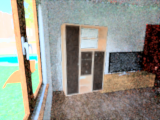

In [0]:
!ls spatial-transformer-GAN/indoor/eval_0/test_warp4_it40000/

from IPython.display import Image
Image('spatial-transformer-GAN/indoor/eval_0/test_warp4_it40000/image43_input.png')

Image('spatial-transformer-GAN/indoor/eval_0/test_warp4_it40000/image43_output.png')


In [0]:
!ls spatial-transformer-GAN/indoor/dataset/train 

disocclude.npy	 indiv_mask.npy    perturb.npy
idx_corresp.npy  perturb_mask.npy  removed.npy


UnicodeDecodeError: ignored

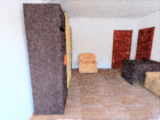

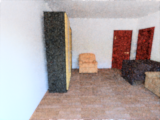

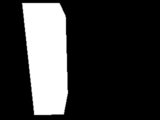

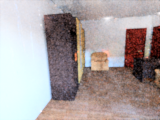

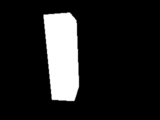

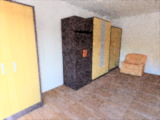

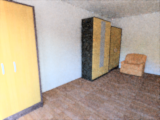

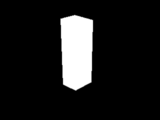

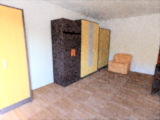

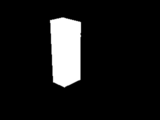

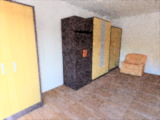

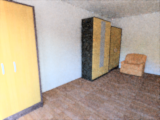

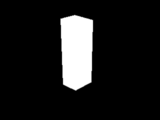

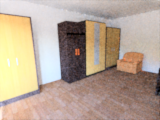

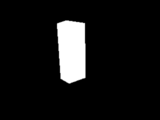

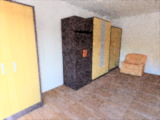

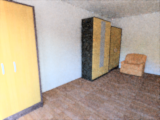

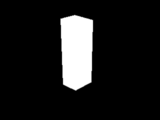

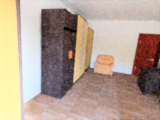

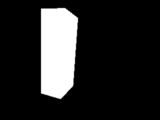

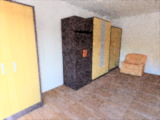

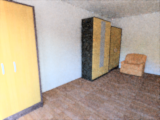

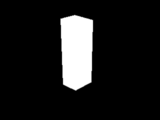

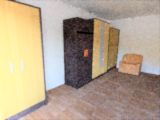

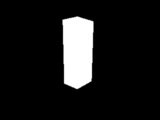

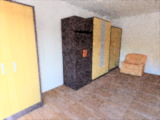

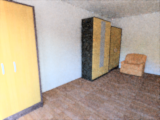

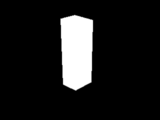

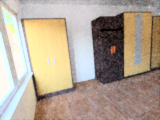

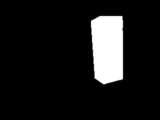

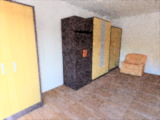

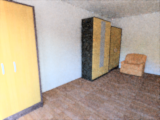

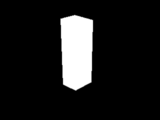

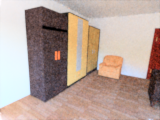

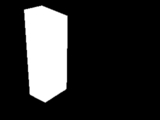

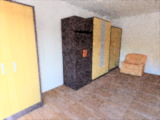

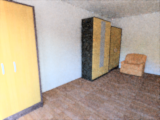

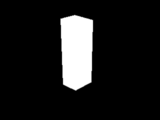

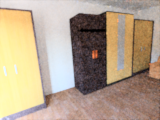

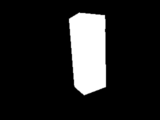

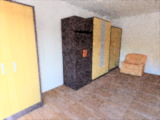

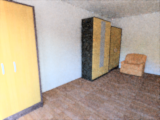

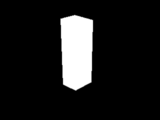

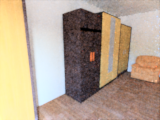

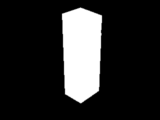

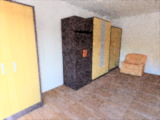

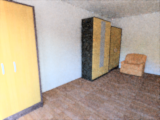

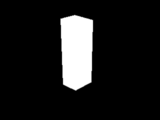

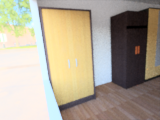

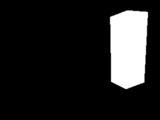

In [0]:
import numpy as np

def load(test=False):
	path = "spatial-transformer-GAN/indoor/dataset/{0}".format("test" if test else "train")
	D = {
		"disocclude": np.load("{0}/disocclude.npy".format(path)),
		"removed": np.load("{0}/removed.npy".format(path)),
		"perturb": np.load("{0}/perturb.npy".format(path)),
		"indiv_mask": np.load("{0}/indiv_mask.npy".format(path)),
		"perturb_mask": np.load("{0}/perturb_mask.npy".format(path)),
		"idx_corresp": np.load("{0}/idx_corresp.npy".format(path)),
	}
	return D

data = load()
# print(a)


import PIL.Image
from io import BytesIO
import IPython.display
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))
    
   
for randIdx in range(0, 10):
  randIdxGT = data["idx_corresp"][randIdx]
  imageBG = data["removed"][randIdxGT]
  imageOrig = data["disocclude"][randIdxGT]
  maskOrig = data["indiv_mask"][randIdxGT]
  imagePert = data["perturb"][randIdx]
  maskPert = data["perturb_mask"][randIdx]

  showarray(imageOrig)
  showarray(imageBG)
  showarray(maskOrig)
  showarray(imagePert)
  showarray(maskPert)